In [1]:
# importing necessary libraries

import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
"""
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from catboost import CatBoostClassifier
import lightgbm as lgb
from lightgbm import LGBMRegressor
from sklearn.metrics import make_scorer, mean_absolute_error
from sklearn.metrics import
"""

'\nfrom sklearn.linear_model import LinearRegression\nfrom sklearn.svm import SVC\nfrom sklearn.naive_bayes import MultinomialNB\nfrom sklearn.tree import DecisionTreeClassifier\nfrom sklearn.neighbors import KNeighborsClassifier\nfrom sklearn.ensemble import RandomForestClassifier\nfrom sklearn.ensemble import AdaBoostClassifier\nfrom sklearn.ensemble import BaggingClassifier\nfrom sklearn.ensemble import ExtraTreesClassifier\nfrom sklearn.ensemble import GradientBoostingClassifier\nfrom xgboost import XGBClassifier\nfrom sklearn.linear_model import LogisticRegression\nfrom catboost import CatBoostClassifier\nimport lightgbm as lgb\nfrom lightgbm import LGBMRegressor\nfrom sklearn.metrics import make_scorer, mean_absolute_error\nfrom sklearn.metrics import\n'

In [3]:
bank = pd.read_csv('Bank customers.csv')
bank.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [4]:
bank.shape

(10127, 21)

In [5]:
bank.isnull().sum()

CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

In [6]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [7]:
# So we will be needing to extract data from Income_Category columns and other 
# categorical columns, since as you can see the data is in string format and the 
# range is giving, not an exact value which can be feeded into the model directly


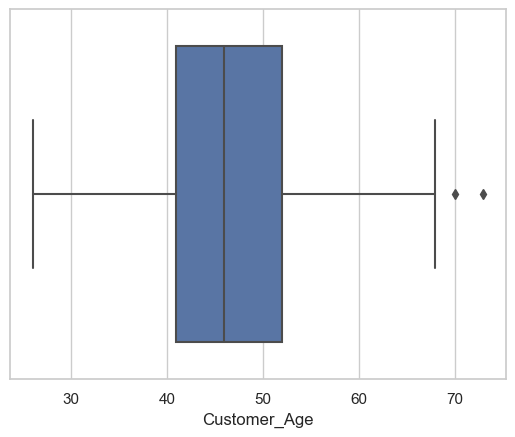

In [8]:
sns.set_theme(style='whitegrid')
sns.boxplot(bank['Customer_Age'])
plt.show()

In [9]:
# Most of the customers are somewhere near 45 years age, some outlier that are depicted by the 
# dots on the right hand side at the age 70 and maybe 75

In [10]:
bank.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

In [11]:
bank[['Gender','Credit_Limit']].groupby('Gender').agg(['mean', 'count'])

Credit_Limit      
                mean count
Gender                    
F        5023.854274  5358
M       12685.674963  4769

In [12]:
bank[['Gender','Avg_Utilization_Ratio']].groupby('Gender').agg(['mean', 'count'])

Avg_Utilization_Ratio      
                        mean count
Gender                            
F                   0.341957  5358
M                   0.199548  4769

In [13]:
bank_cards = bank.groupby('Card_Category')
bank_cards['Customer_Age'].max()

Card_Category
Blue        73
Gold        63
Platinum    56
Silver      65
Name: Customer_Age, dtype: int64

In [14]:
bank_cards = bank.groupby('Card_Category')
bank_cards['Customer_Age'].min()

Card_Category
Blue        26
Gold        29
Platinum    39
Silver      26
Name: Customer_Age, dtype: int64

In [15]:
bank_cards['Avg_Utilization_Ratio'].mean()

Card_Category
Blue        0.290859
Gold        0.057103
Platinum    0.043650
Silver      0.057310
Name: Avg_Utilization_Ratio, dtype: float64

In [16]:
bank_marital = bank.groupby('Marital_Status')

In [17]:
bank_marital['Card_Category'].value_counts()

Marital_Status  Card_Category
Divorced        Blue              696
                Silver             46
                Gold                5
                Platinum            1
Married         Blue             4433
                Silver            206
                Gold               41
                Platinum            7
Single          Blue             3624
                Silver            251
                Gold               58
                Platinum           10
Unknown         Blue              683
                Silver             52
                Gold               12
                Platinum            2
Name: Card_Category, dtype: int64

In [18]:
# Now lets move forward and see if we have categorical data in our dataset
bank.head(2)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105


In [19]:
bank['Attrition_Flag'].value_counts()

Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64

In [20]:
bank['Gender'].value_counts()

F    5358
M    4769
Name: Gender, dtype: int64

In [21]:
bank['Education_Level'].value_counts()

Graduate         3128
High School      2013
Unknown          1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64

In [22]:
bank['Marital_Status'].value_counts()

Married     4687
Single      3943
Unknown      749
Divorced     748
Name: Marital_Status, dtype: int64

In [23]:
def ref1(x):
    if x=='M':
        return 1
    else:
        return 0
bank['Gender'] = bank['Gender'].map(ref1)

In [24]:
bank['Gender'].value_counts()

0    5358
1    4769
Name: Gender, dtype: int64

In [25]:
def ref2(x):
    if x =='Existing Customer':
        return 1
    else:
        return 0
bank['Attrition_Flag'] = bank['Attrition_Flag'].map(ref2)

In [26]:
bank['Attrition_Flag'].value_counts()

1    8500
0    1627
Name: Attrition_Flag, dtype: int64

In [27]:
bank.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,1,45,1,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,1,49,0,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,1,51,1,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,1,40,0,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,1,40,1,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [28]:
# converting categorical data into numerical data
y = bank['Card_Category']
x = bank.copy()

In [29]:
x.head(2)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,1,45,1,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,1,49,0,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105


In [30]:
x['Income_Category'].value_counts()

Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K +            727
Name: Income_Category, dtype: int64

In [32]:
from sklearn.preprocessing import LabelEncoder

def label_encoder(feat):
    le = LabelEncoder()
    le.fit(feat)
    print(feat.name, le.classes_)
    return le.transform(feat)

In [33]:
x['Income_Category'] = label_encoder(x['Income_Category'])
x.head()

Income_Category ['$120K +' '$40K - $60K' '$60K - $80K' '$80K - $120K' 'Less than $40K'
 'Unknown']


,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,1,45,1,3,High School,Married,2,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,1,49,0,5,Graduate,Single,4,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,1,51,1,3,Graduate,Married,3,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,1,40,0,4,High School,Unknown,4,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,1,40,1,3,Uneducated,Married,2,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [34]:
x['Income_Category'].value_counts()

4    3561
1    1790
3    1535
2    1402
5    1112
0     727
Name: Income_Category, dtype: int64

In [35]:
x['Education_Level'] = label_encoder(x['Education_Level'])
x['Marital_Status'] = label_encoder(x['Marital_Status'])
x.head()

Education_Level ['College' 'Doctorate' 'Graduate' 'High School' 'Post-Graduate'
 'Uneducated' 'Unknown']
Marital_Status ['Divorced' 'Married' 'Single' 'Unknown']


,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,1,45,1,3,3,1,2,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,1,49,0,5,2,2,4,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,1,51,1,3,2,1,3,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,1,40,0,4,3,3,4,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,1,40,1,3,5,1,2,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [36]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  int64  
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  int64  
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  int32  
 6   Marital_Status            10127 non-null  int32  
 7   Income_Category           10127 non-null  int32  
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [37]:
x = x.drop(['CLIENTNUM','Card_Category'], axis=1)
x.shape

(10127, 19)

In [38]:
y.value_counts()

Blue        9436
Silver       555
Gold         116
Platinum      20
Name: Card_Category, dtype: int64

In [39]:
y = pd.DataFrame(y, colu

0          Blue
1          Blue
2          Blue
3          Blue
4          Blue
          ...  
10122      Blue
10123      Blue
10124      Blue
10125      Blue
10126    Silver
Name: Card_Category, Length: 10127, dtype: object

In [41]:
y = bank[['Card_Category']]
y

,Card_Category
0,Blue
1,Blue
2,Blue
3,Blue
4,Blue
...,...
10122,Blue
10123,Blue
10124,Blue
10125,Blue


In [42]:
y['Card_Category'] = label_encoder(y['Card_Category'])
y.head()

Card_Category ['Blue' 'Gold' 'Platinum' 'Silver']


,Card_Category
0,0
1,0
2,0
3,0
4,0


In [43]:
y['Card_Category'].value_counts()

0    9436
3     555
1     116
2      20
Name: Card_Category, dtype: int64

In [44]:
x.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,1,45,1,3,3,1,2,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,1,49,0,5,2,2,4,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,1,51,1,3,2,1,3,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,1,40,0,4,3,3,4,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,1,40,1,3,5,1,2,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [45]:
x.describe()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,0.839340,46.325960,0.470919,2.346203,3.096574,1.463415,2.863928,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,0.367235,8.016814,0.499178,1.298908,1.834812,0.737808,1.504700,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,1.000000,41.000000,0.000000,1.000000,2.000000,1.000000,2.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,1.000000,46.000000,0.000000,2.000000,3.000000,1.000000,3.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,1.000000,52.000000,1.000000,3.000000,5.000000,2.000000,4.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,1.000000,73.000000,1.000000,5.000000,6.000000,3.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


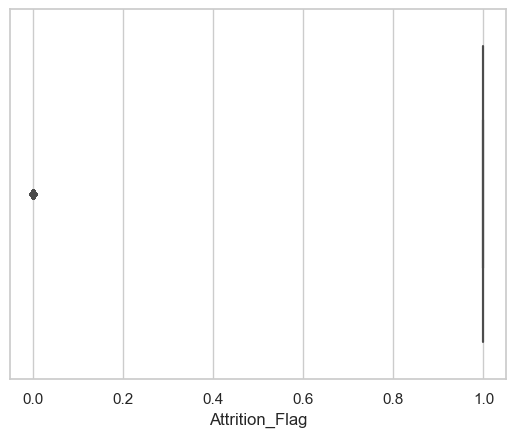

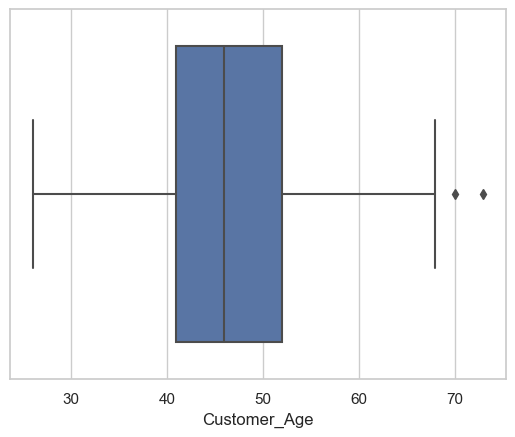

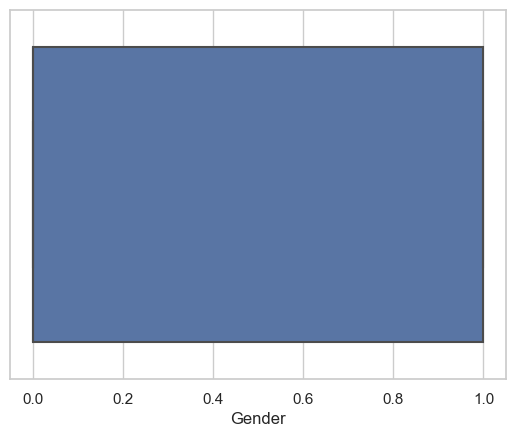

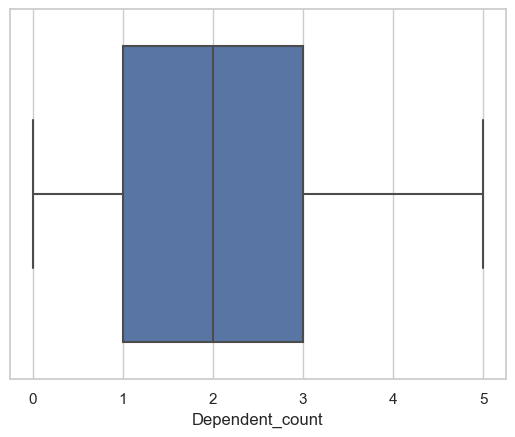

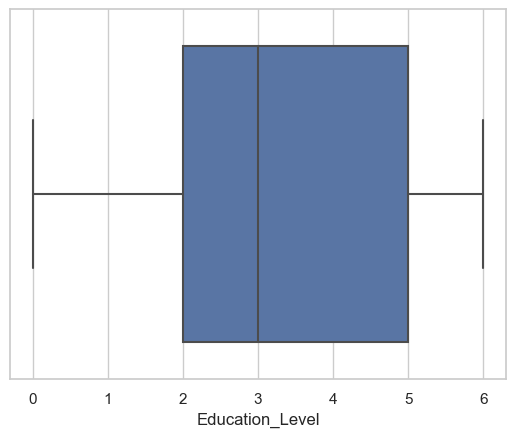

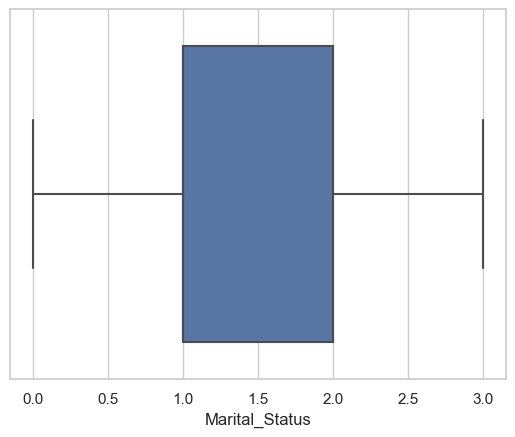

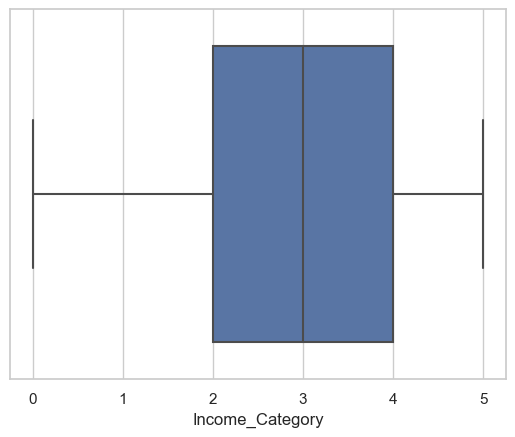

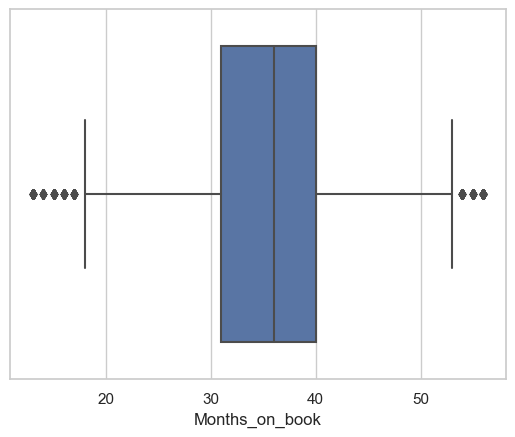

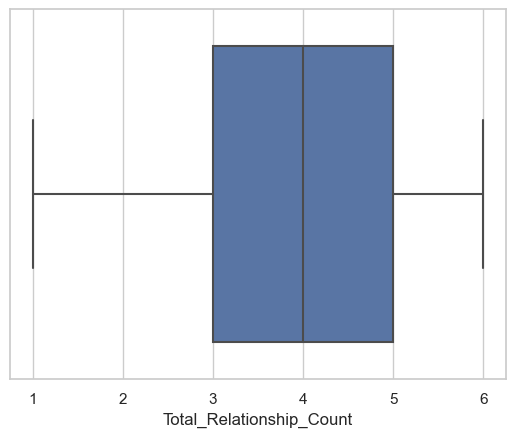

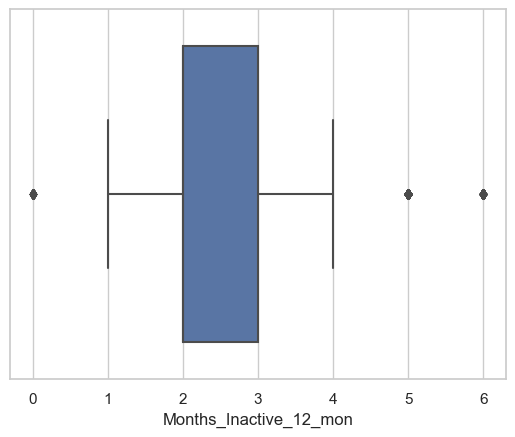

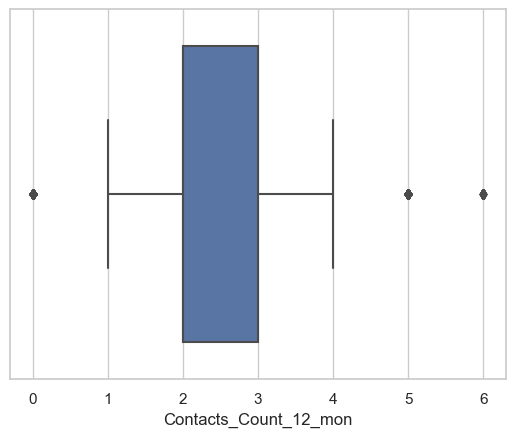

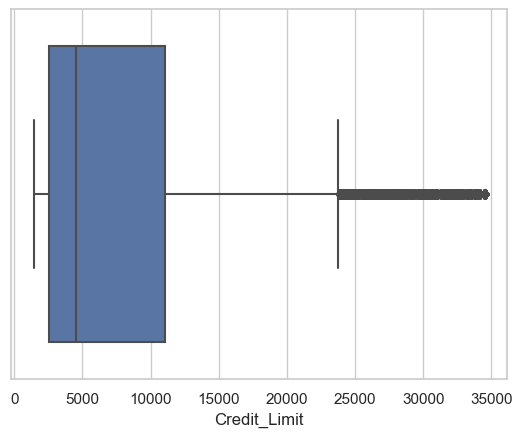

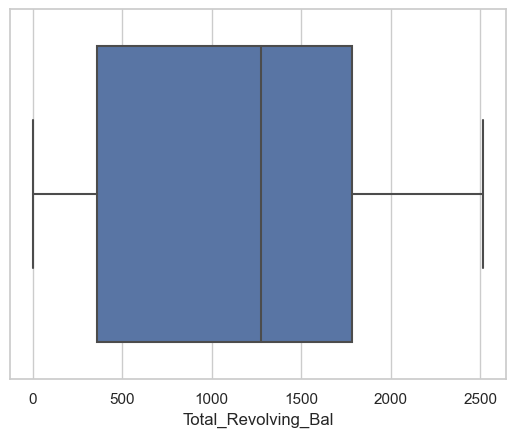

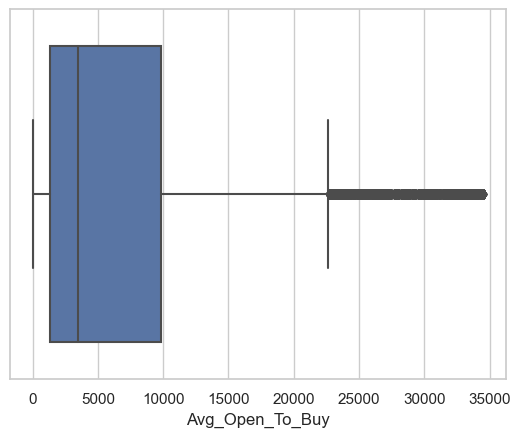

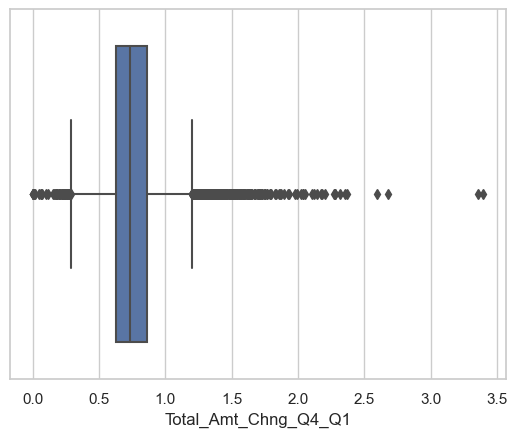

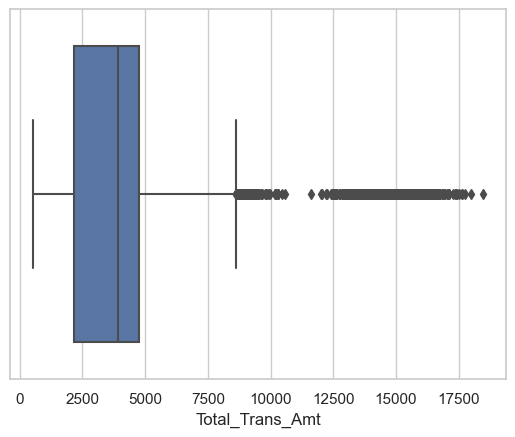

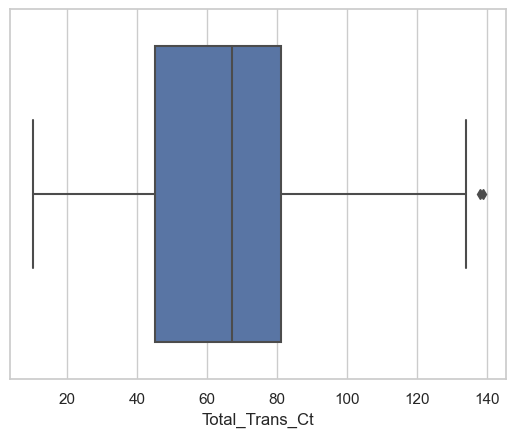

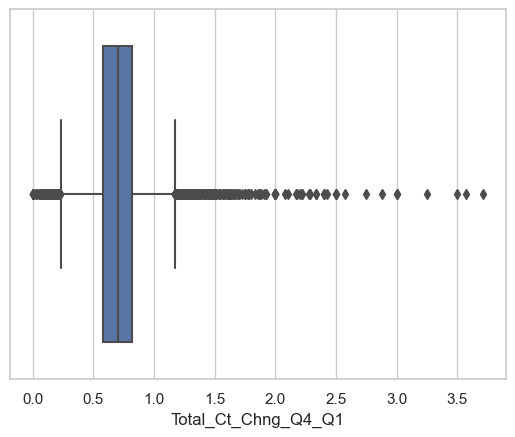

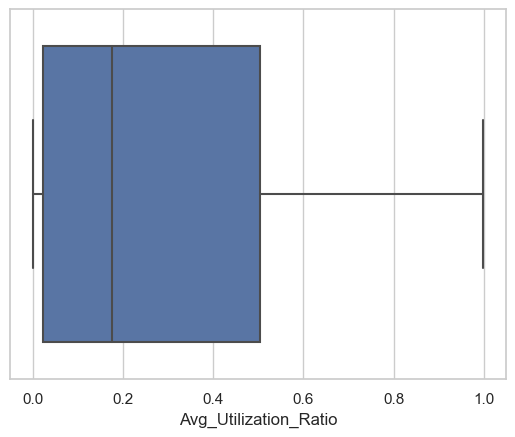

In [46]:
# Outlier 
def boxplots(col):
    sns.boxplot(x[col])
    plt.show()
    
for i in list(x.select_dtypes(exclude=['object']).columns)[0:]:
    boxplots(i)

In [47]:
# Let's check the number of outliers per columns
Q1 = x.quantile(0.25)
Q3 = x.quantile(0.75)
IQR = Q3 - Q1
UL = Q3 + 1.5 * IQR
LL = Q1 - 1.5 * IQR
print(UL)
print()
print(LL)

Attrition_Flag                  1.000
Customer_Age                   68.500
Gender                          2.500
Dependent_count                 6.000
Education_Level                 9.500
Marital_Status                  3.500
Income_Category                 7.000
Months_on_book                 53.500
Total_Relationship_Count        8.000
Months_Inactive_12_mon          4.500
Contacts_Count_12_mon           4.500
Credit_Limit                23836.250
Total_Revolving_Bal          3921.500
Avg_Open_To_Buy             22660.750
Total_Amt_Chng_Q4_Q1            1.201
Total_Trans_Amt              8619.250
Total_Trans_Ct                135.000
Total_Ct_Chng_Q4_Q1             1.172
Avg_Utilization_Ratio           1.223
dtype: float64

Attrition_Flag                  1.000
Customer_Age                   24.500
Gender                         -1.500
Dependent_count                -2.000
Education_Level                -2.500
Marital_Status                 -0.500
Income_Category                -1.

In [49]:
((x>UL) | (x < LL)).sum()

Attrition_Flag              1627
Customer_Age                   2
Gender                         0
Dependent_count                0
Education_Level                0
Marital_Status                 0
Income_Category                0
Months_on_book               386
Total_Relationship_Count       0
Months_Inactive_12_mon       331
Contacts_Count_12_mon        629
Credit_Limit                 984
Total_Revolving_Bal            0
Avg_Open_To_Buy              963
Total_Amt_Chng_Q4_Q1         396
Total_Trans_Amt              896
Total_Trans_Ct                 2
Total_Ct_Chng_Q4_Q1          394
Avg_Utilization_Ratio          0
dtype: int64

In [50]:
x[((x>UL) | (x < LL))] = np.NaN

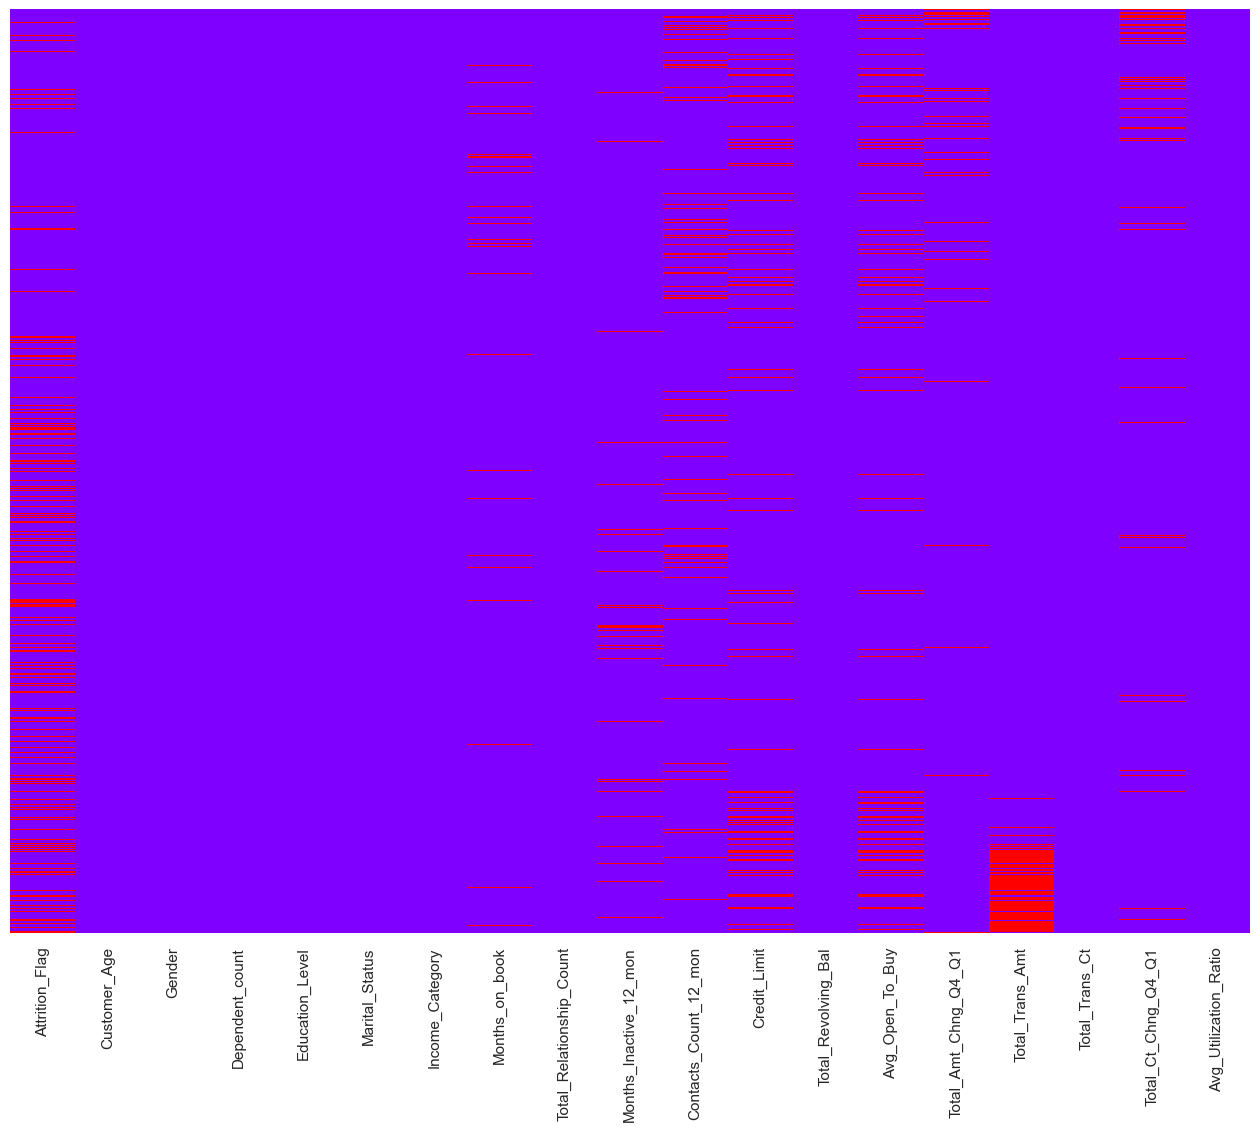

In [51]:
plt.figure(figsize=(16,12))
sns.heatmap(x.isnull(), cbar=False, cmap='rainbow', yticklabels=False)
plt.show()

In [55]:
# Applying capping method by using KNN imputation
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
x_impute = pd.DataFrame(imputer.fit_transform(x), columns=x.columns)
x_impute

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,1.0,45.0,1.0,3.0,3.0,1.0,2.0,39.0,5.0,1.0,3.0,12691.0,777.0,11914.0,0.7828,1144.0,42.0,0.8412,0.061
1,1.0,49.0,0.0,5.0,2.0,2.0,4.0,44.0,6.0,1.0,2.0,8256.0,864.0,7392.0,0.7648,1291.0,33.0,0.7442,0.105
2,1.0,51.0,1.0,3.0,2.0,1.0,3.0,36.0,4.0,1.0,2.8,3418.0,0.0,3418.0,0.7050,1887.0,20.0,0.5718,0.000
3,1.0,40.0,0.0,4.0,3.0,3.0,4.0,34.0,3.0,4.0,1.0,3313.0,2517.0,796.0,0.8256,1171.0,20.0,0.8286,0.760
4,1.0,40.0,1.0,3.0,5.0,1.0,2.0,21.0,5.0,1.0,3.2,4716.0,0.0,4716.0,0.8498,816.0,28.0,0.8014,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,1.0,50.0,1.0,2.0,2.0,2.0,1.0,40.0,3.0,2.0,3.0,4003.0,1851.0,2152.0,0.7030,4724.2,117.0,0.8570,0.462
10123,1.0,41.0,1.0,2.0,6.0,0.0,1.0,25.0,4.0,2.0,3.0,4277.0,2186.0,2091.0,0.8040,5210.2,69.0,0.6830,0.511
10124,1.0,44.0,0.0,1.0,3.0,1.0,4.0,36.0,5.0,3.0,4.0,5409.0,0.0,5409.0,0.8190,3423.8,60.0,0.8180,0.000
10125,1.0,30.0,1.0,2.0,2.0,3.0,1.0,36.0,4.0,3.0,3.0,5281.0,0.0,5281.0,0.5350,8395.0,62.0,0.7220,0.000


In [58]:
x_impute.isnull().sum().sum()

0

In [60]:
# Feature scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = pd.DataFrame(scaler.fit_transform(x_impute), columns=x_impute.columns)

In [61]:
x_scaled

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,0.0,-0.164953,1.059956,0.503368,-0.052637,-0.628128,-0.574182,0.445726,0.763943,-1.483108,0.560289,1.221012,-0.473422,1.285984,0.272150,-1.436350,-0.974253,0.837367,-0.775882
1,0.0,0.334481,-0.943436,2.043199,-0.597678,0.727306,0.755053,1.162235,1.407306,-1.483108,-0.543612,0.361427,-0.366667,0.413906,0.161001,-1.354814,-1.358070,0.282046,-0.616276
2,0.0,0.584198,1.059956,0.503368,-0.597678,-0.628128,0.090436,0.015820,0.120579,-1.483108,0.339509,-0.576266,-1.426858,-0.352489,-0.208260,-1.024235,-1.912473,-0.704937,-0.997155
3,0.0,-0.789247,-0.943436,1.273283,-0.052637,2.082739,0.755053,-0.270784,-0.522785,2.064343,-1.647513,-0.596617,1.661686,-0.858148,0.536438,-1.421374,-1.912473,0.765233,1.759686
4,0.0,-0.789247,1.059956,0.503368,1.037447,-0.628128,-0.574182,-2.133708,0.763943,-1.483108,0.781070,-0.324690,-1.426858,-0.102167,0.685872,-1.618279,-1.571302,0.609514,-0.997155
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,0.0,0.459340,1.059956,-0.266547,-0.597678,0.727306,-1.238799,0.589028,-0.522785,-0.300624,0.560289,-0.462882,0.844455,-0.596640,-0.220610,0.549455,2.224226,0.927821,0.678714
10123,0.0,-0.664388,1.059956,-0.266547,1.582489,-1.983561,-1.238799,-1.560501,0.120579,-0.300624,0.560289,-0.409776,1.255524,-0.608404,0.403059,0.819021,0.177200,-0.068321,0.856458
10124,0.0,-0.289812,-0.943436,-1.036462,-0.052637,-0.628128,0.755053,0.015820,0.763943,0.881859,1.664191,-0.190373,-1.426858,0.031480,0.495683,-0.171829,-0.206618,0.704548,-0.997155
10125,0.0,-2.037833,1.059956,-0.266547,-0.597678,2.082739,-1.238799,0.015820,0.120579,0.881859,0.560289,-0.215182,-1.426858,0.006794,-1.258001,2.585512,-0.121325,0.154952,-0.997155


In [62]:
# Split the data into training and test
from sklearn.model_selection import train_test_split

In [63]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42,
                                                   stratify=y)

In [ ]:
# Feature Selection 
# Techniques - Correlation analysis, DT feature importance , RF feature importance
# GDboosting feature importance, XGB feature importance , Regularization - ridge, lasso, elasticnet
# VIF - regression , permutation importance, recursive feature technique, P-Value
# PCA, LDA, T-SNA

# popular - recursive feature technique, pca

# EDA - dtale , dataprep, pandas-profiling, lux, plotly

In [64]:
#!pip install dtale
import dtale
dtale.show(bank)

# Building ensemble model

# RandomForest Classifier

In [66]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train, y_train)

RandomForestClassifier()

In [74]:
f_df = pd.DataFrame({"feature":x_train.columns, 
                     'rf_importance':rf.feature_importances_}).sort_values(by='rf_importance',
                                                                          ascending=False)

In [75]:
f_df

,feature,rf_importance
11,Credit_Limit,0.118091
18,Avg_Utilization_Ratio,0.115606
13,Avg_Open_To_Buy,0.108823
15,Total_Trans_Amt,0.081479
6,Income_Category,0.078331
12,Total_Revolving_Bal,0.070821
16,Total_Trans_Ct,0.064046
14,Total_Amt_Chng_Q4_Q1,0.056011
17,Total_Ct_Chng_Q4_Q1,0.053658
1,Customer_Age,0.044960


In [67]:
pred_train_rf = rf.predict(x_train)
pred_test_rf = rf.predict(x_test)

In [68]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [69]:
print("***************Confusion Matrix*********************")
print(confusion_matrix(y_train, pred_train_rf))
print("*******************************")
print(confusion_matrix(y_test, pred_test_rf))

***************Confusion Matrix*********************
[[7548    0    0    0]
 [   0   93    0    0]
 [   1    0   15    0]
 [   0    0    0  444]]
*******************************
[[1885    0    0    3]
 [  20    0    0    3]
 [   2    0    0    2]
 [  86    0    0   25]]


In [70]:
print("***************classification_report*********************")
print(classification_report(y_train, pred_train_rf))
print("*******************************")
print(classification_report(y_test, pred_test_rf))

***************classification_report*********************
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7548
           1       1.00      1.00      1.00        93
           2       1.00      0.94      0.97        16
           3       1.00      1.00      1.00       444

    accuracy                           1.00      8101
   macro avg       1.00      0.98      0.99      8101
weighted avg       1.00      1.00      1.00      8101

*******************************
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1888
           1       0.00      0.00      0.00        23
           2       0.00      0.00      0.00         4
           3       0.76      0.23      0.35       111

    accuracy                           0.94      2026
   macro avg       0.43      0.31      0.33      2026
weighted avg       0.92      0.94      0.92      2026



In [71]:
print("***************accuracy_score*********************")
print(accuracy_score(y_train, pred_train_rf))
print("*******************************")
print(accuracy_score(y_test, pred_test_rf))

***************accuracy_score*********************
0.9998765584495741
*******************************
0.9427443237907206


# RandomForest Classifier with feature selection part  - recursive feature technique

In [79]:
from sklearn.feature_selection import RFE
rf1 = RandomForestClassifier()
feature_1 = RFE(estimator=rf1, n_features_to_select=17, step=1 )
feature_1 = feature_1.fit(x_train, y_train)

In [80]:
pred_train_rf1 = feature_1.predict(x_train)
pred_test_rf1 = feature_1.predict(x_test)

In [81]:
print("***************accuracy_score*********************")
print(accuracy_score(y_train, pred_train_rf1))
print("*******************************")
print(accuracy_score(y_test, pred_test_rf1))

***************accuracy_score*********************
1.0
*******************************
0.9407699901283317


In [83]:
# cross validation method
from sklearn.model_selection import cross_val_score
rf_rfe_training = cross_val_score(feature_1, x_train, y_train, cv=10)
print(rf_rfe_training)
print()
print(rf_rfe_training.mean())

[0.94821208 0.95185185 0.94074074 0.9382716  0.94074074 0.94197531
 0.94567901 0.94938272 0.94444444 0.95185185]

0.9453150355452042


# PCA Method

In [85]:
from sklearn.decomposition import PCA
pca = PCA(n_components=10)
pca_fit = pca.fit_transform(x_scaled)

In [87]:
x_train, x_test, y_train, y_test = train_test_split(pca_fit, y, test_size=0.2, random_state=42,
                                                   stratify=y)

In [96]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
gb.fit(x_train, y_train)

GradientBoostingClassifier()

In [102]:
"""
f_df2 = pd.DataFrame({"feature":x_train.columns, 
                     'gb_importance':gb.feature_importances_}).sort_values(by='gb_importance',
                                                                           ascending=False)  
f_df2
"""

'\nf_df2 = pd.DataFrame({"feature":x_train.columns, \n                     \'gb_importance\':gb.feature_importances_}).sort_values(by=\'gb_importance\',\n                                                                           ascending=False)  \nf_df2\n'

In [97]:
pred_train_gb = gb.predict(x_train)
pred_test_gb = gb.predict(x_test)

In [98]:
print("***************accuracy_score*********************")
print(accuracy_score(y_train, pred_train_gb))
print("*******************************")
print(accuracy_score(y_test, pred_test_gb))

***************accuracy_score*********************
0.9507468213800765
*******************************
0.928923988153998


In [103]:
x.columns

Index(['Attrition_Flag', 'Customer_Age', 'Gender', 'Dependent_count',
       'Education_Level', 'Marital_Status', 'Income_Category',
       'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')